In [12]:
import json
import pandas as pd
import numpy as np
# import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
ls ../corpus*/TrainTestSet/

../corpus1/TrainTestSet/:
Testset/     Testset.zip* Trainset/

../corpus2/TrainTestSet/:
Testset.zip* Trainset/


In [14]:
ls ../corpus*/TrainTestSet/Trainset/

../corpus1/TrainTestSet/Trainset/:
Doclengths_of_the_individual_docs_TRAIN.json*
VerzoekEnBesluit/
data/
ocred_text.csv.gz*

../corpus2/TrainTestSet/Trainset/:
Doclengths_of_the_individual_docs_TRAIN.json*
data/
ocred_text.csv.gz*


In [17]:
f1= open('../corpus1/TrainTestSet/Trainset/Doclengths_of_the_individual_docs_TRAIN.json')
f2= open('../corpus2/TrainTestSet/Trainset/Doclengths_of_the_individual_docs_TRAIN.json')
# only works when secret Testset is open
# f2test= open('../corpus2/TrainTestSet/Trainset/Doclengths_of_the_individual_docs_TRAIN.json')
# f1test= open('../corpus1/TrainTestSet/Trainset/Doclengths_of_the_individual_docs_TRAIN.json')
truth_corpus1,truth_corpus2=(
    json.load(f1),json.load(f2)
)

D={'corpus1': {'train': 
               {'#files': len(truth_corpus1),
                '#docs': sum(len(l) for l in truth_corpus1.values()),
               '#pages': sum(sum(l) for l in truth_corpus1.values())},          
              },
   'corpus2': {'train': 
               {'#files': len(truth_corpus2),
                '#docs': sum(len(l) for l in truth_corpus2.values()),
               '#pages': sum(sum(l) for l in truth_corpus2.values())},   
   }
  }
 
D

{'corpus1': {'train': {'#files': 113, '#docs': 3914, '#pages': 19102}},
 'corpus2': {'train': {'#files': 52, '#docs': 2123, '#pages': 16537}}}

In [18]:
# ocr text of c2 is only the train corpus , for c1 it is train and test
c1,c2= (pd.read_csv('../corpus1/TrainTestSet/Trainset/ocred_text.csv.gz'),
        pd.read_csv('../corpus2/TrainTestSet/Trainset/ocred_text.csv.gz'))
c1.name=c1.name.str.replace('__concatenated','')
c2.name=c2.name.str.replace('__concatenated','')
#c2test.name=c2test.name.str.replace('__concatenated','')

In [19]:
c1

,Unnamed: 0,full_name,name,page,text
0,0,993832_files.zip__concatenated-0961.txt,993832_files.zip,961,2085\n2086\n2087\n2088\n2089\n2090\n2091\n2092...
1,1,963330_bijlagen.zip__concatenated-017.txt,963330_bijlagen.zip,17,26-mei-2011\n55-09-0102\n\nGemeente Amsterdam\...
2,2,890248__concatenated-252.txt,890248,252,o gehele of gedeeltelijke integratie van woons...
3,3,892231__concatenated-36.txt,892231,36,NaN
4,4,967331_files_1_1.zip__concatenated-578.txt,967331_files_1_1.zip,578,X X X\n\nGemeente l\nA mste rd am 1018 XA Amst...
...,...,...,...,...,...
25212,25212,890321__concatenated-715.txt,890321,715,Gemeente Amsterdam Versie 3\nProjectplan Javab...
25213,25213,964251_files_1.zip__concatenated-23.txt,964251_files_1.zip,23,\n\n \n\n \n\nBeleidsregels\nreclame en\n\nmm...
25214,25214,967331_files_1_1.zip__concatenated-486.txt,967331_files_1_1.zip,486,\n\n \n\nkeuze voor keuze voor keuze voor in ...
25215,25215,889752__concatenated-274.txt,889752,274,\n\n* X X\n\n \n\nCanonaanpassing bij wijzigi...


In [20]:
D['corpus1']['train']['#words']= c1[c1.name.isin(truth_corpus1)].text.str.split(r'\W+').str.len().fillna(0).sum().astype(int)
D['corpus2']['train']['#words']= c2[c2.name.isin(truth_corpus2)].text.str.split(r'\W+').str.len().fillna(0).sum().astype(int)
# D['corpus1']['test']['#words']= c1[~c1.name.isin(truth_corpus1)].text.str.split(r'\W+').str.len().fillna(0).sum().astype(int)
# D['corpus2']['test']['#words']= c2test[~c2test.name.isin(truth_corpus2)].text.str.split(r'\W+').str.len().fillna(0).sum().astype(int)

In [21]:
D['corpus1']['train']['VocabSize']=len({w  for l in c1[c1.name.isin(truth_corpus1)].text.str.split(r'\W+').dropna().values
                                        for w in l  })
D['corpus2']['train']['VocabSize']=len({w  for l in c2[c2.name.isin(truth_corpus2)].text.str.split(r'\W+').dropna().values
                                        for w in l  })
# D['corpus1']['test']['VocabSize']=len({w  for l in c1[~c1.name.isin(truth_corpus1)].text.str.split(r'\W+').dropna().values
#                                         for w in l  })

# D['corpus2']['test']['VocabSize']=len({w  for l in c2test[~c2test.name.isin(truth_corpus2)].text.str.split(r'\W+').dropna().values
#                                         for w in l  })


# final overview table

In [22]:
a= pd.DataFrame.from_dict(D['corpus1'], orient='index')


In [24]:
multiindex=pd.MultiIndex.from_product([['corpus1','corpus2'],['train']]) 
df= pd.concat([pd.DataFrame.from_dict(D['corpus1'], orient='index'),
          pd.DataFrame.from_dict(D['corpus2'], orient='index')]).fillna(0).astype(int) 
df.set_index(multiindex, inplace=True)
df.to_pickle('EDATable.pkl')
print(df.to_html())
df

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>#files</th>
      <th>#docs</th>
      <th>#pages</th>
      <th>#words</th>
      <th>VocabSize</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>corpus1</th>
      <th>train</th>
      <td>113</td>
      <td>3914</td>
      <td>19102</td>
      <td>4541516</td>
      <td>155797</td>
    </tr>
    <tr>
      <th>corpus2</th>
      <th>train</th>
      <td>52</td>
      <td>2123</td>
      <td>16537</td>
      <td>4141853</td>
      <td>189648</td>
    </tr>
  </tbody>
</table>


,,#files,#docs,#pages,#words,VocabSize
corpus1,train,113,3914,19102,4541516,155797
corpus2,train,52,2123,16537,4141853,189648


# Distributions 

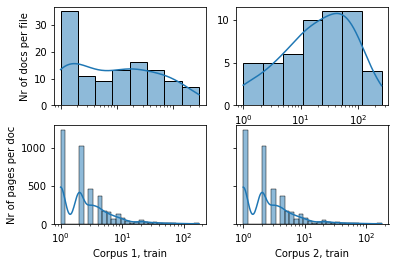

In [199]:
fig, axs = plt.subplots(2, 2)

#axs[0,0].set_title('Nr of docs per file ')
#axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0, 1]')
#axs[1, 0].plot(x, -y, 'tab:green')
#axs[1, 0].set_title('Axis [1, 0]')
#axs[1, 1].plot(x, -y, 'tab:red')
#axs[1, 1].set_title('Axis [1, 1]')

 

axs[0,0].set(xlabel=' ', ylabel='Nr of docs per file' )  
axs[1,0].set(xlabel='Corpus 1, train', ylabel='Nr of pages per doc' )  
axs[1,1].set(xlabel='Corpus 2, train', ylabel='')
axs[0,1].set(ylabel=' ', xlabel=' ')

#for ax in axs.flat:
axs[1,1].label_outer()
axs[0,1].set_xticklabels([]) #.label_outer()
axs[0,0].label_outer()

# nr of docs per file: corpus 1, train
sns.histplot(pd.Series([len(l) for l in truth_corpus1.values()]), log_scale=(True,False), kde=True, ax=axs[0, 0]);

# nr of docs per file: corpus 2, train
sns.histplot(pd.Series([len(l) for l in truth_corpus2.values()]), log_scale=(True,False), kde=True
           , ax=axs[0, 1]);

# nr of pages per doc: corpus 1, train
sns.histplot(pd.Series([p  for l in truth_corpus1.values() for p in l] ), log_scale=(True,False), kde=True
           , ax=axs[1, 0]);

# nr of pages per doc: corpus 2, train
sns.histplot(pd.Series([p  for l in truth_corpus1.values() for p in l]), log_scale=(True,False), kde=True
           , ax=axs[1, 1]);

fig.savefig('EDAdistributions.png')

In [205]:
ls 

EDA.ipynb             EDATable.pkl          EDAdistributions.png


In [200]:
#!cp EDAdistributions.png ../../../../DocumentSplitting/wobir/ProbeerselsMarx/BcubedPR/ICTIR_Paper/DocumentSplitting